In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Vaccine Model

In [64]:
# Load datasets
clinical = pd.read_csv('Data/WHO_NREVSS_Clinical_Labs.csv', header=1)
vacc = pd.read_csv('flu_vaccine.csv')

In [65]:
vacc

,Influenza_Season,Start_Date,End_Date,Reporting_Timeframe,Week,Week_Sort_Order,Current_Season_Week_Ending_Label,Cumulative_Flu_Doses_Distributed,Current_Through
0,2018-2019,07/29/2018,08/04/2018,2018-07-29 - 2018-08-04,30,1,08/05/2023,0.52,03/04/2023
1,2018-2019,08/05/2018,08/11/2018,2018-08-05 - 2018-08-11,31,2,08/12/2023,3.23,03/04/2023
2,2018-2019,08/12/2018,08/18/2018,2018-08-12 - 2018-08-18,32,3,08/19/2023,10.18,03/04/2023
3,2018-2019,08/19/2018,08/25/2018,2018-08-19 - 2018-08-25,33,4,08/26/2023,19.99,03/04/2023
4,2018-2019,08/26/2018,09/01/2018,2018-08-26 - 2018-09-01,34,5,09/02/2023,37.38,03/04/2023
...,...,...,...,...,...,...,...,...,...
188,2023-2024,02/04/2024,02/10/2024,2024-02-04 - 2024-02-10,5,28,02/10/2024,157.19,03/09/2024
189,2023-2024,02/11/2024,02/17/2024,2024-02-11 - 2024-02-17,6,29,02/17/2024,157.35,03/09/2024
190,2023-2024,02/18/2024,02/24/2024,2024-02-18 - 2024-02-24,7,30,02/24/2024,157.52,03/09/2024
191,2023-2024,02/25/2024,03/02/2024,2024-02-25 - 2024-03-02,8,31,03/02/2024,157.62,03/09/2024


In [66]:
# Filter for the 2022-2023 season
vacc = vacc[vacc['Influenza_Season'] == '2022-2023']

In [67]:
total_vaccines = []
cumvaccines = []
vaccumulative =[]

vacc['weekly_vaccinated'] = vacc['Cumulative_Flu_Doses_Distributed'].diff().fillna(vacc['Cumulative_Flu_Doses_Distributed'])
total_vaccines = vacc['weekly_vaccinated'] 
total_vaccines = np.pad(total_vaccines, (0, 20), 'constant')

vaccumulative = vacc['Cumulative_Flu_Doses_Distributed'] * 1000
maxvac = pd.Series([173000] * 20)

cumvaccines = pd.concat([vaccumulative, maxvac], ignore_index=True)
len(vaccumulative)

/var/folders/6v/d4ttnwgs14q94mgg08fjyd6r0000gn/T/ipykernel_30848/1229773115.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vacc['weekly_vaccinated'] = vacc['Cumulative_Flu_Doses_Distributed'].diff().fillna(vacc['Cumulative_Flu_Doses_Distributed'])


32

In [68]:
# grab all weeks greater than 40 and less than 30 (since the season starts in week 40 and ends in week 30)
vacc = vacc[(vacc['Week'] >= 40) | (vacc['Week'] < 30)]

In [69]:
vacc.shape

(22, 10)

In [70]:
vacc.head()

# Note: the 2022-2023 season starts in Week 30 of 2022 whereas in the clinical dataset it starts in Week 40 of 2022
# There is a slight discrepancy is the season definition

,Influenza_Season,Start_Date,End_Date,Reporting_Timeframe,Week,Week_Sort_Order,Current_Season_Week_Ending_Label,Cumulative_Flu_Doses_Distributed,Current_Through,weekly_vaccinated
138,2022-2023,10/02/2022,10/08/2022,2022-10-02 - 2022-10-08,40,11,10/07/2023,115.81,03/09/2024,10.04
139,2022-2023,10/09/2022,10/15/2022,2022-10-09 - 2022-10-15,41,12,10/14/2023,128.43,03/09/2024,12.62
140,2022-2023,10/16/2022,10/22/2022,2022-10-16 - 2022-10-22,42,13,10/21/2023,136.95,03/09/2024,8.52
141,2022-2023,10/23/2022,10/29/2022,2022-10-23 - 2022-10-29,43,14,10/28/2023,145.77,03/09/2024,8.82
142,2022-2023,10/30/2022,11/05/2022,2022-10-30 - 2022-11-05,44,15,11/04/2023,150.17,03/09/2024,4.40


In [71]:
# join clinical and vacc dataset on the week column 
clinical['Week'] = clinical['WEEK']
clinical = clinical.merge(vacc, on='Week', how='left')

In [72]:
clinical.head()

,REGION TYPE,REGION,YEAR,WEEK,TOTAL SPECIMENS,TOTAL A,TOTAL B,PERCENT POSITIVE,PERCENT A,PERCENT B,Week,Influenza_Season,Start_Date,End_Date,Reporting_Timeframe,Week_Sort_Order,Current_Season_Week_Ending_Label,Cumulative_Flu_Doses_Distributed,Current_Through,weekly_vaccinated
0,National,X,2022,40,78249,1984,105,2.66968,2.53550,0.134187,40,2022-2023,10/02/2022,10/08/2022,2022-10-02 - 2022-10-08,11.0,10/07/2023,115.81,03/09/2024,10.04
1,National,X,2022,41,88055,2961,88,3.46261,3.36267,0.099937,41,2022-2023,10/09/2022,10/15/2022,2022-10-09 - 2022-10-15,12.0,10/14/2023,128.43,03/09/2024,12.62
2,National,X,2022,42,95427,5080,108,5.43662,5.32344,0.113176,42,2022-2023,10/16/2022,10/22/2022,2022-10-16 - 2022-10-22,13.0,10/21/2023,136.95,03/09/2024,8.52
3,National,X,2022,43,112851,9341,113,8.37742,8.27729,0.100132,43,2022-2023,10/23/2022,10/29/2022,2022-10-23 - 2022-10-29,14.0,10/28/2023,145.77,03/09/2024,8.82
4,National,X,2022,44,133627,16953,145,12.79530,12.68680,0.108511,44,2022-2023,10/30/2022,11/05/2022,2022-10-30 - 2022-11-05,15.0,11/04/2023,150.17,03/09/2024,4.40


In [74]:
clinical.tail()

,REGION TYPE,REGION,YEAR,WEEK,TOTAL SPECIMENS,TOTAL A,TOTAL B,PERCENT POSITIVE,PERCENT A,PERCENT B,Week,Influenza_Season,Start_Date,End_Date,Reporting_Timeframe,Week_Sort_Order,Current_Season_Week_Ending_Label,Cumulative_Flu_Doses_Distributed,Current_Through,weekly_vaccinated
47,National,X,2023,35,53059,266,115,0.718069,0.501329,0.216740,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,National,X,2023,36,55332,262,126,0.701222,0.473505,0.227716,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,National,X,2023,37,58288,314,148,0.792616,0.538704,0.253912,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,National,X,2023,38,61602,347,217,0.915555,0.563293,0.352261,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,National,X,2023,39,61810,360,217,0.933506,0.582430,0.351076,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
clinical['Week_Adjusted'] = np.arange(1,53)

In [76]:
clinical.head()

,REGION TYPE,REGION,YEAR,WEEK,TOTAL SPECIMENS,TOTAL A,TOTAL B,PERCENT POSITIVE,PERCENT A,PERCENT B,...,Influenza_Season,Start_Date,End_Date,Reporting_Timeframe,Week_Sort_Order,Current_Season_Week_Ending_Label,Cumulative_Flu_Doses_Distributed,Current_Through,weekly_vaccinated,Week_Adjusted
0,National,X,2022,40,78249,1984,105,2.66968,2.53550,0.134187,...,2022-2023,10/02/2022,10/08/2022,2022-10-02 - 2022-10-08,11.0,10/07/2023,115.81,03/09/2024,10.04,1
1,National,X,2022,41,88055,2961,88,3.46261,3.36267,0.099937,...,2022-2023,10/09/2022,10/15/2022,2022-10-09 - 2022-10-15,12.0,10/14/2023,128.43,03/09/2024,12.62,2
2,National,X,2022,42,95427,5080,108,5.43662,5.32344,0.113176,...,2022-2023,10/16/2022,10/22/2022,2022-10-16 - 2022-10-22,13.0,10/21/2023,136.95,03/09/2024,8.52,3
3,National,X,2022,43,112851,9341,113,8.37742,8.27729,0.100132,...,2022-2023,10/23/2022,10/29/2022,2022-10-23 - 2022-10-29,14.0,10/28/2023,145.77,03/09/2024,8.82,4
4,National,X,2022,44,133627,16953,145,12.79530,12.68680,0.108511,...,2022-2023,10/30/2022,11/05/2022,2022-10-30 - 2022-11-05,15.0,11/04/2023,150.17,03/09/2024,4.40,5


In [78]:
clinical.tail()

,REGION TYPE,REGION,YEAR,WEEK,TOTAL SPECIMENS,TOTAL A,TOTAL B,PERCENT POSITIVE,PERCENT A,PERCENT B,...,Influenza_Season,Start_Date,End_Date,Reporting_Timeframe,Week_Sort_Order,Current_Season_Week_Ending_Label,Cumulative_Flu_Doses_Distributed,Current_Through,weekly_vaccinated,Week_Adjusted
47,National,X,2023,35,53059,266,115,0.718069,0.501329,0.216740,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48
48,National,X,2023,36,55332,262,126,0.701222,0.473505,0.227716,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49
49,National,X,2023,37,58288,314,148,0.792616,0.538704,0.253912,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50
50,National,X,2023,38,61602,347,217,0.915555,0.563293,0.352261,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51
51,National,X,2023,39,61810,360,217,0.933506,0.582430,0.351076,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52


In [94]:
# Replace missing values with 0
clinical.fillna(0, inplace=True)

In [96]:
clinical.head()

,REGION TYPE,REGION,YEAR,WEEK,TOTAL SPECIMENS,TOTAL A,TOTAL B,PERCENT POSITIVE,PERCENT A,PERCENT B,...,End_Date,Reporting_Timeframe,Week_Sort_Order,Current_Season_Week_Ending_Label,Cumulative_Flu_Doses_Distributed,Current_Through,weekly_vaccinated,Week_Adjusted,TOTAL POSITIVE,TOTAL POPULATION
0,National,X,2022,40,78249,1984,105,2.66968,2.53550,0.134187,...,10/08/2022,2022-10-02 - 2022-10-08,11.0,10/07/2023,115.81,03/09/2024,10.04,1,2089,81606.365385
1,National,X,2022,41,88055,2961,88,3.46261,3.36267,0.099937,...,10/15/2022,2022-10-09 - 2022-10-15,12.0,10/14/2023,128.43,03/09/2024,12.62,2,3049,81606.365385
2,National,X,2022,42,95427,5080,108,5.43662,5.32344,0.113176,...,10/22/2022,2022-10-16 - 2022-10-22,13.0,10/21/2023,136.95,03/09/2024,8.52,3,5188,81606.365385
3,National,X,2022,43,112851,9341,113,8.37742,8.27729,0.100132,...,10/29/2022,2022-10-23 - 2022-10-29,14.0,10/28/2023,145.77,03/09/2024,8.82,4,9454,81606.365385
4,National,X,2022,44,133627,16953,145,12.79530,12.68680,0.108511,...,11/05/2022,2022-10-30 - 2022-11-05,15.0,11/04/2023,150.17,03/09/2024,4.40,5,17098,81606.365385


In [79]:
clinical.shape

(52, 21)

In [82]:
# Make Start_Date_y a string 
clinical['Start_Date'] = clinical['Start_Date'].astype(str)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, '10/02/2022'),
  Text(1, 0, '10/09/2022'),
  Text(2, 0, '10/16/2022'),
  Text(3, 0, '10/23/2022'),
  Text(4, 0, '10/30/2022'),
  Text(5, 0, '11/06/2022'),
  Text(6, 0, '11/13/2022'),
  Text(7, 0, '11/20/2022'),
  Text(8, 0, '11/27/2022'),
  Text(9, 0, '12/04/2022'),
  Text(10, 0, '12/11/2022'),
  Text(11, 0, '12/18/2022'),
  Text(12, 0, '12/25/2022'),
  Text(13, 0, '01/01/2023'),
  Text(14, 0, '01/08/2023'),
  Text(15, 0, '01/15/2023'),
  Text(16, 0, '01/22/2023'),
  Text(17, 0, '01/29/2023'),
  Text(18, 0, '02/05/2023'),
  Text(19, 0, '02/12/2023'),
  Text(20, 0, '02/19/2023'),
  Text(21, 0, '02/26/2023'),
  Text(22, 0, 'nan')])

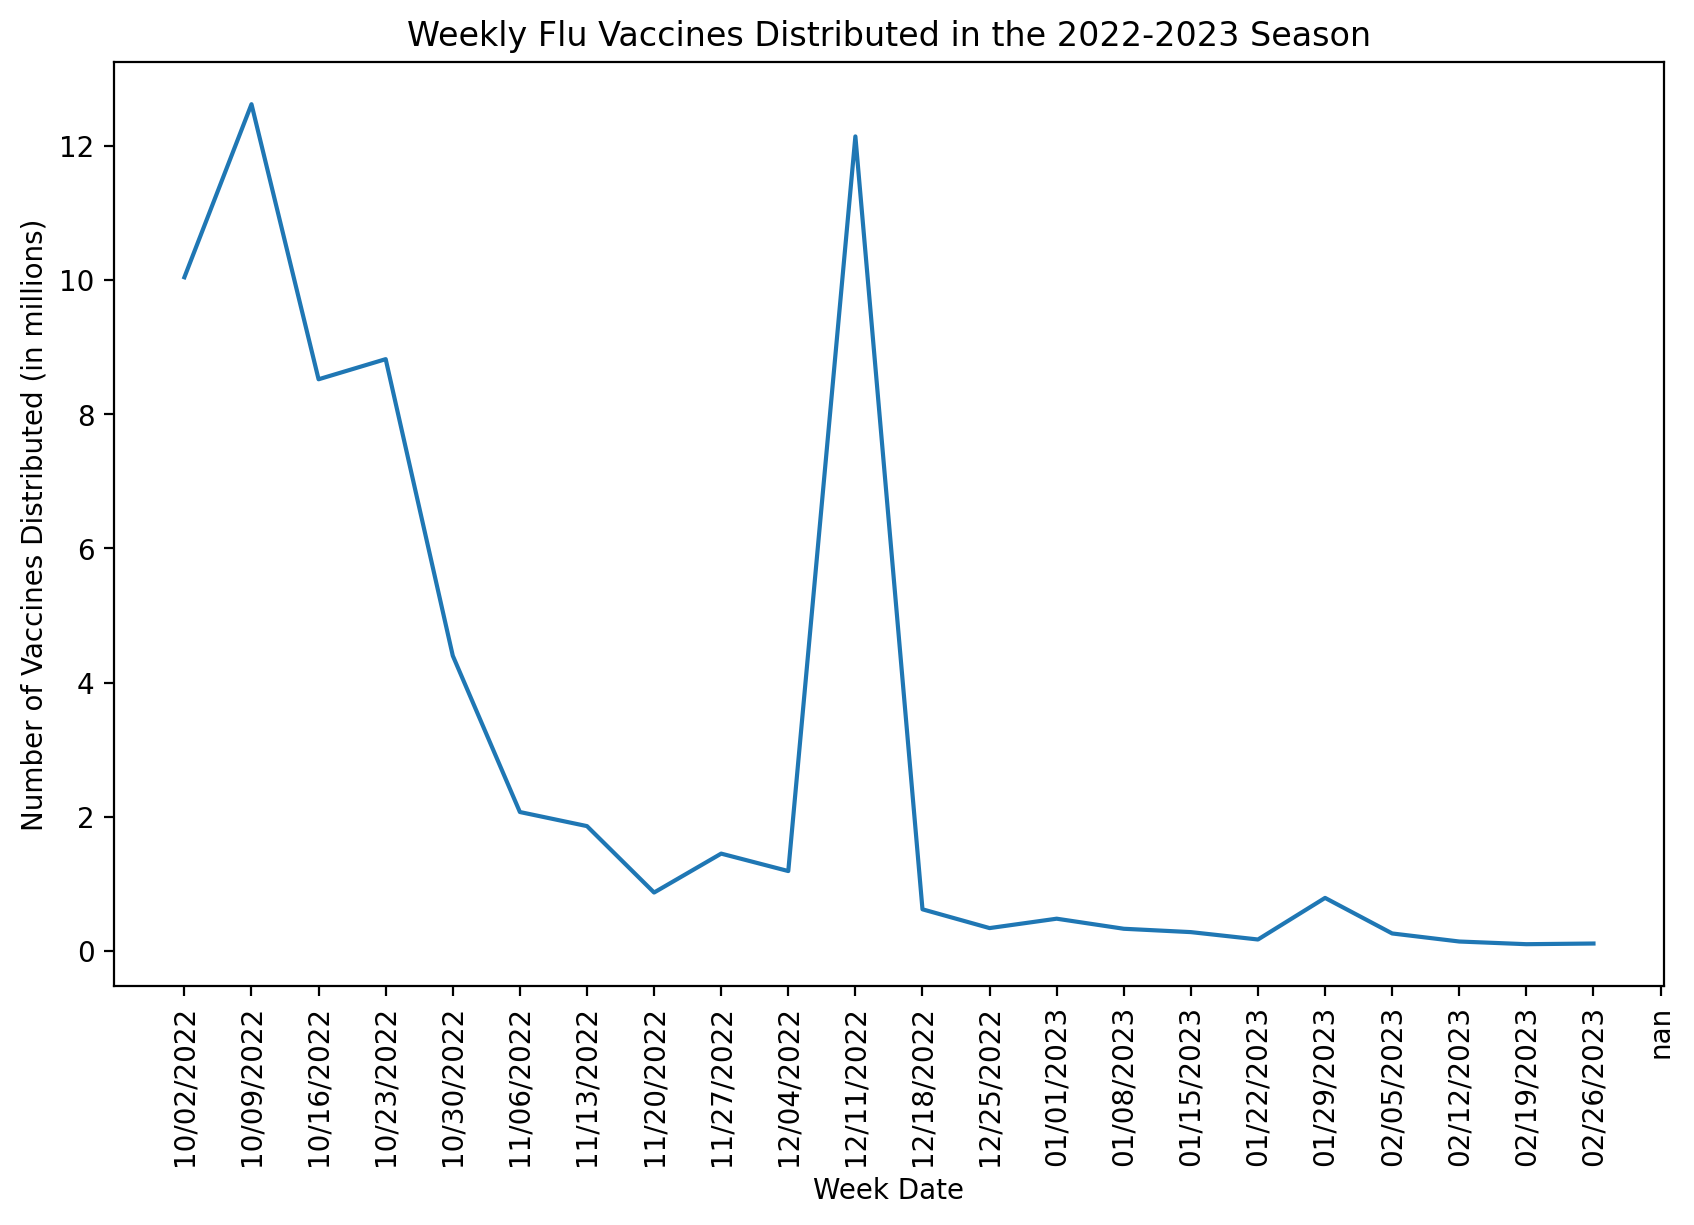

In [84]:
# Plot the number of vaccines distributed
plt.figure(figsize=(10, 6), dpi=200)
plt.plot(clinical['Start_Date'], clinical['weekly_vaccinated'])
plt.title('Weekly Flu Vaccines Distributed in the 2022-2023 Season')
plt.xlabel('Week Date')
plt.ylabel('Number of Vaccines Distributed (in millions)')
plt.xticks(rotation=90)

In [85]:
clinical['TOTAL POSITIVE'] = clinical['TOTAL A'] + clinical['TOTAL B']

In [89]:
# Make the total population the average of the total specimens tested
clinical['TOTAL POPULATION'] = (clinical['TOTAL SPECIMENS'].sum() / clinical['TOTAL SPECIMENS'].count())

In [205]:
'''Here we define the total population to be the average of all the total specimens 
tested in the clinical dataset. This is not the actual population of the United States but 
can serve as a proxy since that is the data we have. We also adjust the total immunized 
value to be in thousands since the total population is in thousands. However, the original
data is in the milions. '''

total_people = clinical['TOTAL POPULATION'].iloc[:52]
total_infected = clinical['TOTAL POSITIVE'].iloc[:52]
total_immunized = clinical['weekly_vaccinated'].iloc[:52] * 3000 # convert to thousands
total_susceptible = total_people - total_infected + 0.6 * total_immunized

# According to the CDC, taking the flue reduces chances of getting infected 
# by 40 to 60 percent. We take the lower bound of 40 percent here. 


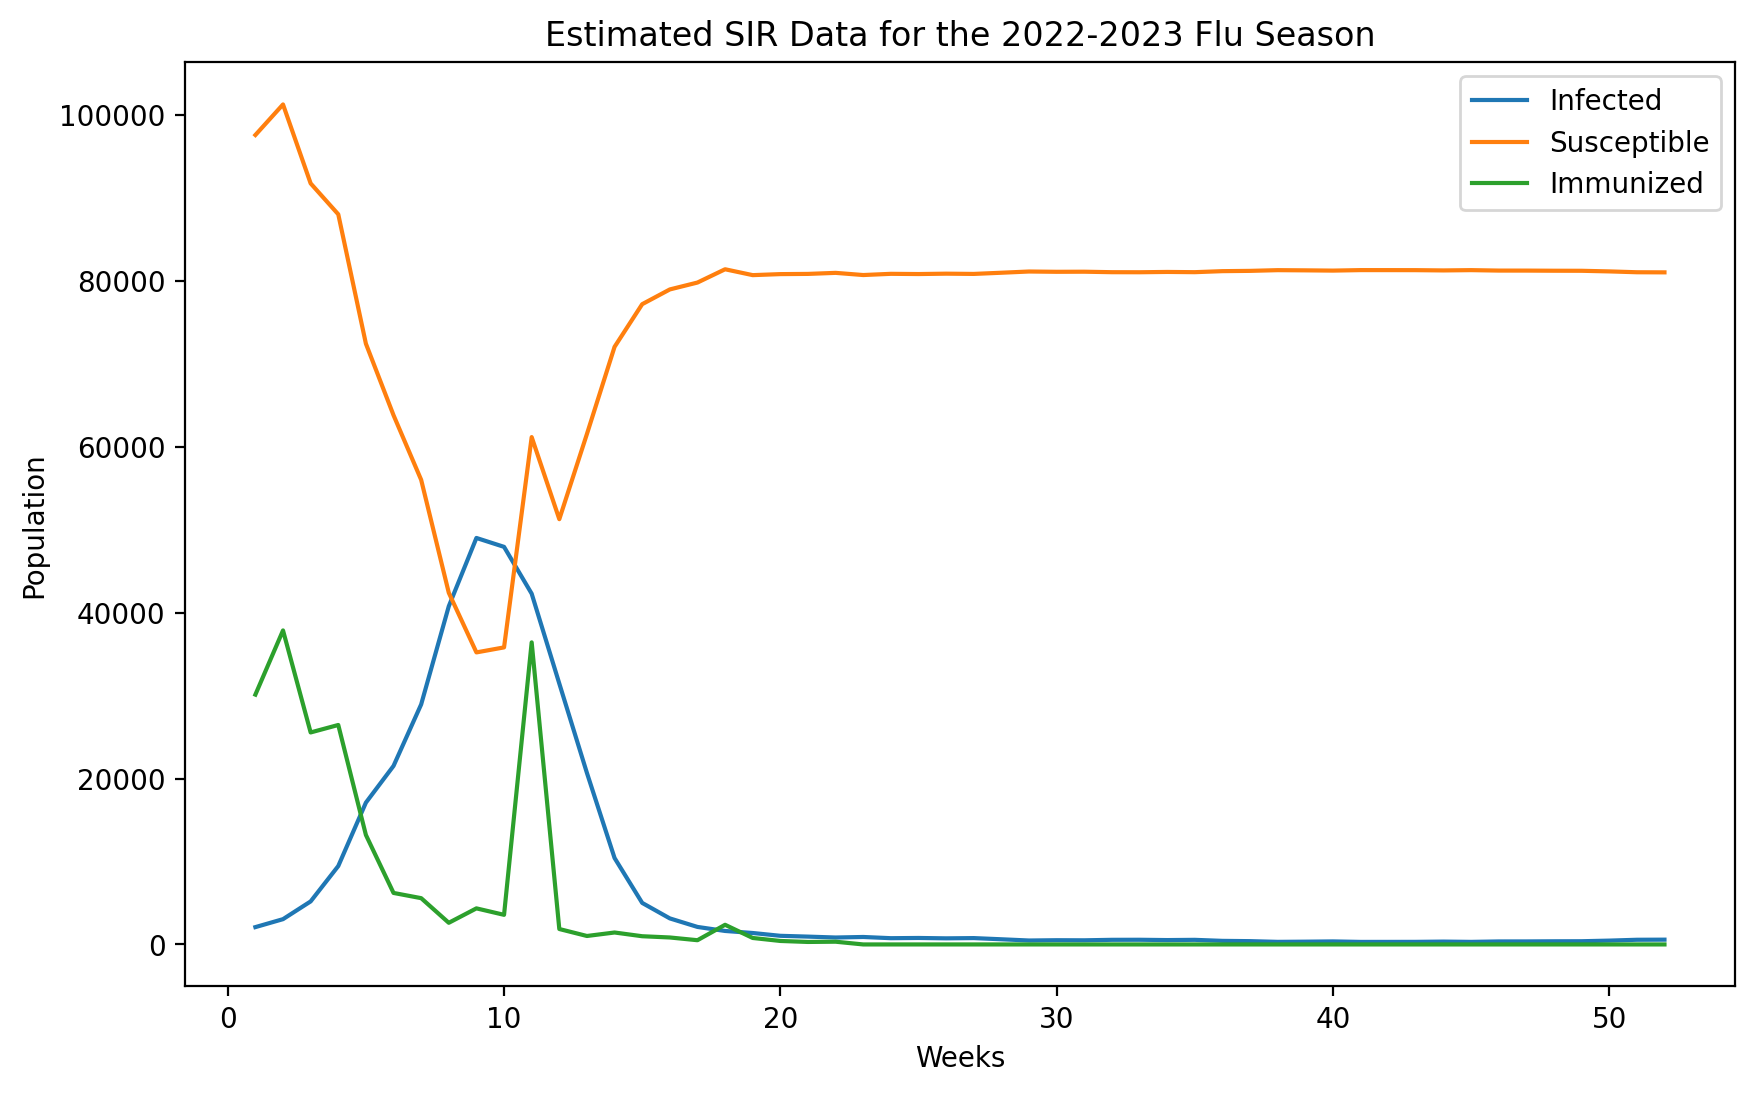

In [206]:
plt.figure(figsize=(10, 6), dpi=200)
plt.plot(clinical['Week_Adjusted'], total_infected,label='Infected')
plt.plot(clinical['Week_Adjusted'], total_susceptible, label='Susceptible')
plt.plot(clinical['Week_Adjusted'], total_immunized,label='Immunized')
plt.xlabel('Weeks')
plt.ylabel('Population')
plt.title('Estimated SIR Data for the 2022-2023 Flu Season')
plt.legend()
plt.show()


In [207]:
init_i = total_infected.iloc[0]
init_r = total_immunized.iloc[0]
init_s = total_susceptible.iloc[0] 
init_conditions = [init_s, init_i, init_r]

In [208]:
from scipy.integrate import odeint

# Time frame
t = np.arange(1, len(total_immunized) + 1)

# Define the SIR model
def sir_model(y, t, beta, gamma):
    s, i, r = y
    n = s + i + r
    dsdt = -beta * (s * i/n) 
    didt = (beta * (s * i/n) ) - (gamma * i)
    drdt = gamma * i
    return [dsdt, didt, drdt]

# Parameters
beta = 0.4
gamma = 0.2
parameters = (beta, gamma)

# Solve the ODE
solution = odeint(sir_model, init_conditions, t, args=parameters)

In [209]:
S,I,R = solution.T

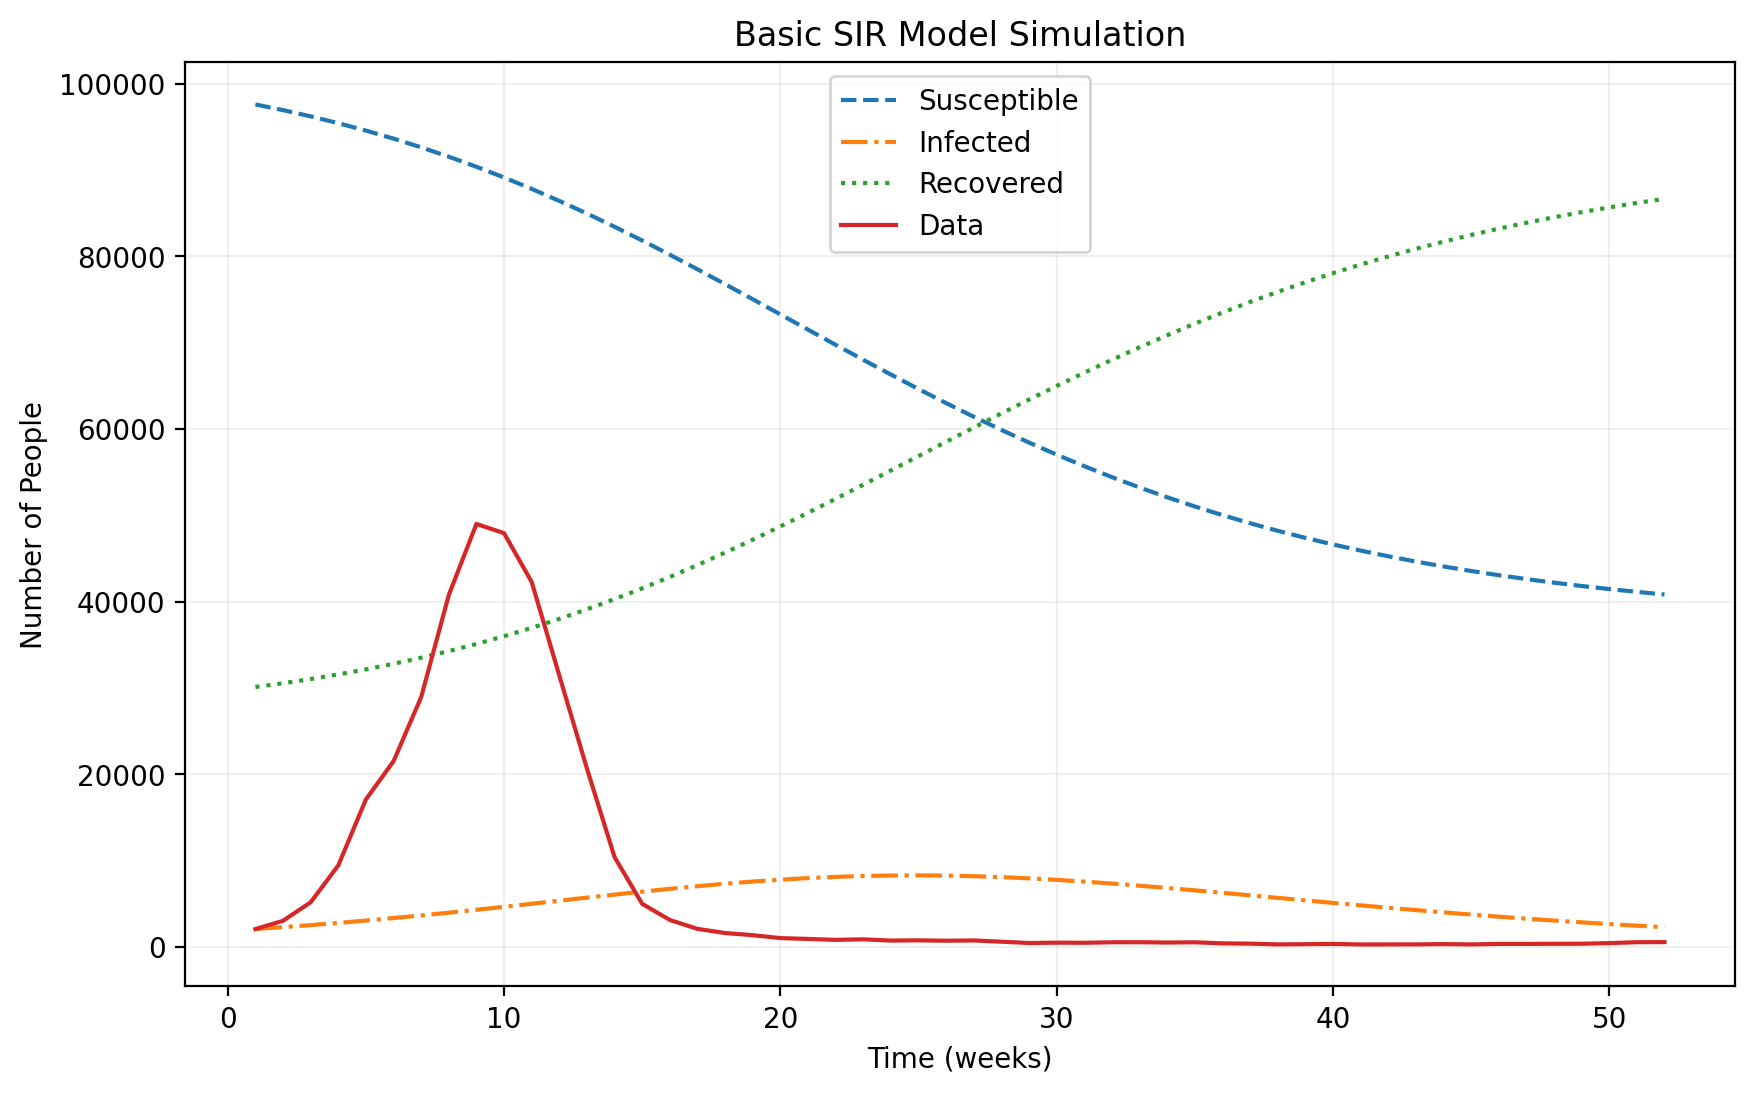

In [210]:
plt.figure(figsize=(10, 6), dpi=200)
plt.plot(t, solution[:, 0], label='Susceptible', linestyle='--')
plt.plot(t, solution[:, 1], label='Infected', linestyle='-.')
plt.plot(t, solution[:, 2], label='Recovered', linestyle=':')
plt.plot(t, total_infected, label='Data', linestyle='-')
plt.xlabel('Time (weeks)')
plt.ylabel('Number of People')
plt.title('Basic SIR Model Simulation')
plt.grid(alpha=0.2)
plt.legend()
plt.show()

In [211]:
from scipy.optimize import curve_fit

# Define the SIR model function again
def sir_model_opt(t, beta, gamma):
    def derivative(y, t):
        s, i, r = y
        n = s + i + r
        dsdt = -beta * (s * i/n) 
        didt = (beta * (s * i/n) ) - (gamma * i)
        drdt = gamma * i
        return [dsdt, didt, drdt]
    return odeint(derivative, init_conditions, t)

# Define the error function
def error_func(t, *params):
    beta, gamma = params
    model = sir_model_opt(t, beta, gamma)[:, 1]
    return np.sum(np.square(model - total_infected))

# Initial guess for parameters
initial_guess = [0.1, 0.5]

# Fit the model to the data
optimal_params, _ = curve_fit(error_func, t, total_infected, p0=initial_guess)

# Extract the optimal parameters
optimal_beta, optimal_gamma = optimal_params

print("Optimal beta:", round(optimal_beta, 4))
print("Optimal gamma:", round(optimal_gamma, 4))

Optimal beta: 1.194
Optimal gamma: 0.2474


/usr/local/lib/python3.10/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/var/folders/6v/d4ttnwgs14q94mgg08fjyd6r0000gn/T/ipykernel_30848/1851322854.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  dsdt = -beta * (s * i/n)
/var/folders/6v/d4ttnwgs14q94mgg08fjyd6r0000gn/T/ipykernel_30848/1851322854.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  didt = (beta * (s * i/n) ) - (gamma * i)


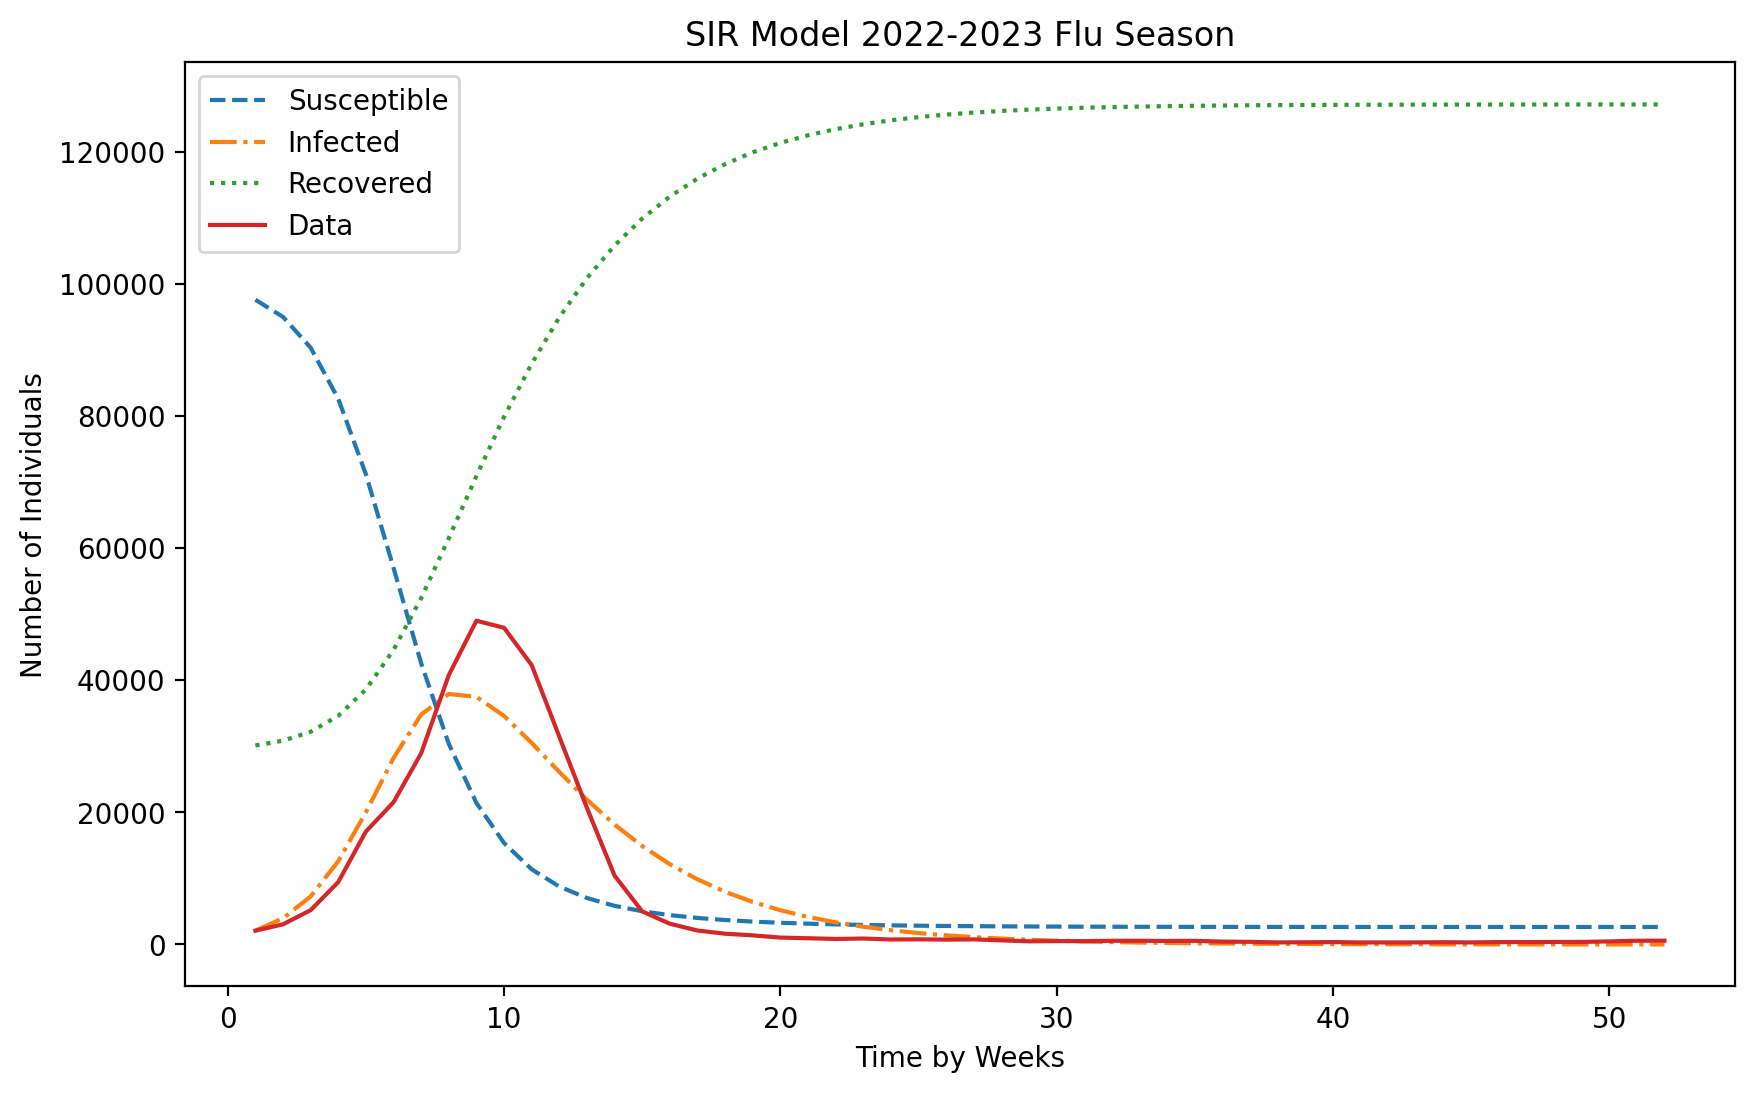

In [212]:
# plot the optimal fit
solution = sir_model_opt(t, optimal_beta, optimal_gamma)
plt.figure(figsize=(10, 6), dpi=200)
plt.plot(t, solution[:, 0], label='Susceptible', linestyle='--')
plt.plot(t, solution[:, 1], label='Infected', linestyle='-.')
plt.plot(t, solution[:, 2], label='Recovered', linestyle=':')
plt.plot(t, total_infected, label='Data', linestyle='-')

plt.xlabel('Time by Weeks')
plt.ylabel('Number of Individuals')
plt.title('SIR Model 2022-2023 Flu Season')
plt.legend()

In [213]:
# Calculate the mse for the model
optimal_mse = np.mean((solution[:, 1] - total_infected) ** 2)
print(optimal_mse)

# Caluclate the rmse for the model
optimal_rmse = np.sqrt(optimal_mse)
print(optimal_rmse)

19202006.377121333
4382.009399478889


#### State Differences

In [164]:
## Comparing different states 
states = pd.read_csv('/Users/marikikuta/Downloads/FluViewPhase2Data (2)/WHO_NREVSS_Clinical_Labs.csv', header=1)
states.head()

fl = states[states['REGION'] == 'Florida']
ma = states[states['REGION'] == 'Massachusetts']
tx = states[states['REGION'] == 'Texas']
Week_Adjusted = np.arange(1,53)

In [130]:
fl.head()
flinfr=fl['PERCENT POSITIVE']
mainfr=ma['PERCENT POSITIVE']
#flinfr=fl['PERCENT POSITIVE']
mainfr

1       0.64
4       0.75
7       0.99
10      1.45
13      3.27
16      4.13
19      7.75
22     14.89
25     19.87
28     25.40
31     25.54
34     25.19
37     17.81
40     11.25
43      5.57
46      4.18
49      2.59
52      1.73
55      1.31
58      1.49
61      1.53
64      0.79
67      0.77
70      0.85
73      0.85
76      1.13
79      0.97
82      0.96
85      0.62
88      0.48
91      0.89
94      0.67
97      0.87
100     1.15
103     0.88
106     0.84
109     0.36
112     0.50
115     0.80
118     1.29
121     1.24
124     0.70
127     0.42
130     0.71
133     0.28
136     0.89
139     0.69
142     0.88
145     0.40
148     0.45
151     0.93
154     1.31
Name: PERCENT POSITIVE, dtype: float64

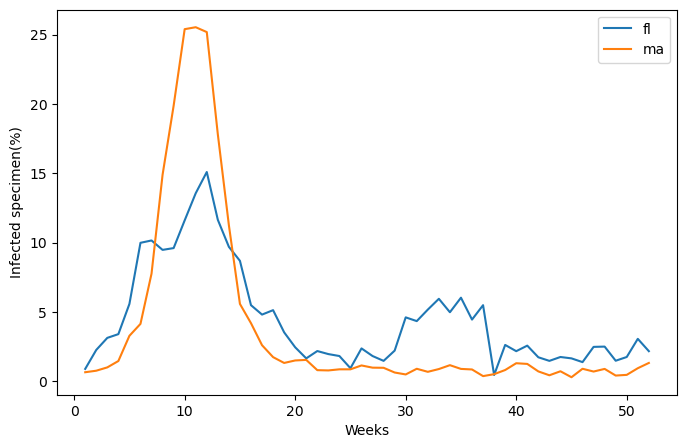

In [165]:
plt.figure(figsize=(8, 5))
plt.plot(Week_Adjusted, flinfr,label='fl')
plt.plot(Week_Adjusted, mainfr, label='ma')
plt.xlabel('Weeks')
plt.ylabel('Infected specimen(%)')
plt.legend()
plt.show()


In [166]:
# Immunization
statevacc = pd.read_csv('/Users/marikikuta/Downloads/flmavacc2.csv', header=0)
statevacc.head()

fl = statevacc[statevacc['Geographic_Name'] == 'Florida']
ma = statevacc[statevacc['Geographic_Name'] == 'Massachusetts']
#tx = states[states['REGION'] == 'Texas']
Month_Adjusted = np.arange(1,10)

In [159]:
flvacc = fl['ND_Weekly_Estimate']
mavacc = ma['ND_Weekly_Estimate']

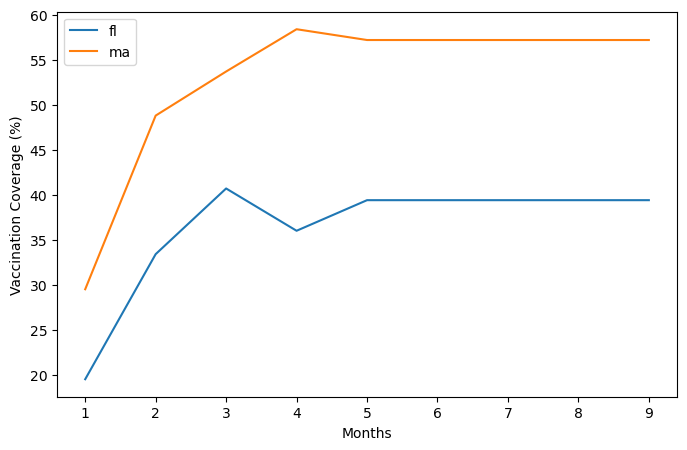

In [168]:
plt.figure(figsize=(8, 5))
plt.plot(Month_Adjusted, flvacc, label='fl')
plt.plot(Month_Adjusted, mavacc, label='ma')
plt.xlabel('Months')
plt.ylabel('Vaccination Coverage (%)')
plt.legend()
plt.show()

In [187]:
flweekly = fl['ND_Weekly_Estimate'].repeat(4).reset_index(drop=True)
maweekly = ma['ND_Weekly_Estimate'].repeat(4).reset_index(drop=True)

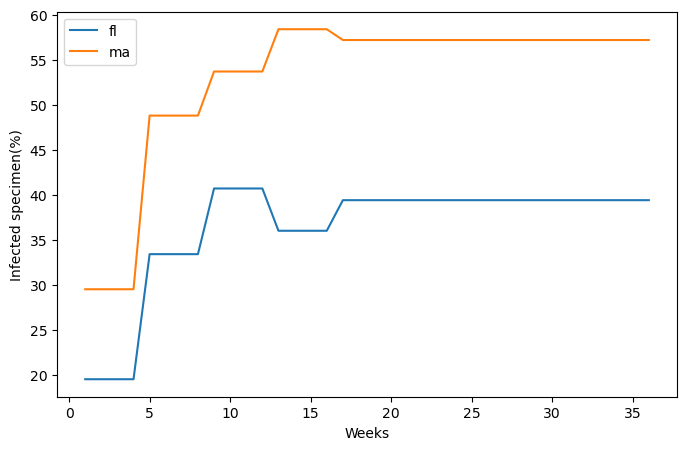

In [192]:
new_weekadjusted = np.arange(1,37)
plt.figure(figsize=(8, 5))
plt.plot(new_weekadjusted, flweekly,label='fl')
plt.plot(new_weekadjusted, maweekly, label='ma')
plt.xlabel('Weeks')
plt.ylabel('Infected specimen(%)')
plt.legend()
plt.show()

In [225]:

fl_people = pd.Series([100.00] * 36)
ma_people = pd.Series([100.00] * 36)

In [226]:
fl_susceptible = []
ma_susceptible = []
flinfr = flinfr.iloc[:36]
mainfr = mainfr.iloc[:36]


In [227]:
#assume that 10% of U.S. population are suceptible (gets flu) each year

fl_sus= fl_people.sub(flweekly, fill_value=0) 
fl_susceptible = fl_sus.sub(flinfr,fill_value=0)

ma_sus = ma_people.sub(maweekly, fill_value=0) 
ma_susceptible = ma_sus.sub(mainfr,fill_value=0)


In [230]:
print(len(flinfr))
print(len(mainfr))
print(len(flweekly))
print(len(maweekly))
ma_susceptible = ma_susceptible[:36]
fl_susceptible = fl_susceptible[:36]
print(len(fl_susceptible))
print(len(ma_susceptible))

36
36
36
36
36
36


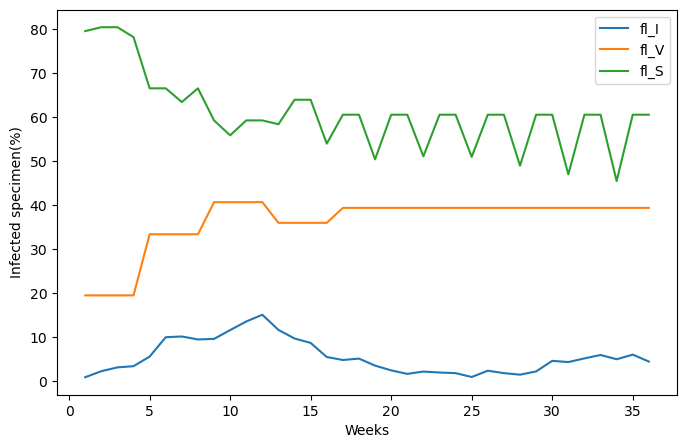

In [239]:
plt.figure(figsize=(8, 5))
plt.plot(new_weekadjusted, flinfr,label='fl_I')
#plt.plot(new_weekadjusted, mainfr, label='ma_I')
plt.plot(new_weekadjusted, flweekly,label='fl_V')
#plt.plot(new_weekadjusted, maweekly, label='ma_V')
plt.plot(new_weekadjusted, fl_susceptible,label='fl_S')
#plt.plot(new_weekadjusted, ma_susceptible, label='ma_S')
plt.xlabel('Weeks')
plt.ylabel('Infected specimen(%)')
plt.legend()
plt.show()


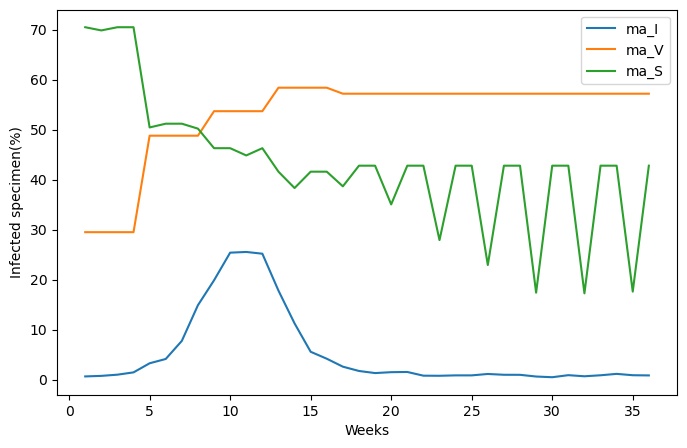

In [240]:
plt.figure(figsize=(8, 5))
#plt.plot(new_weekadjusted, flinfr,label='fl_I')
plt.plot(new_weekadjusted, mainfr, label='ma_I')
#plt.plot(new_weekadjusted, flweekly,label='fl_V')
plt.plot(new_weekadjusted, maweekly, label='ma_V')
#plt.plot(new_weekadjusted, fl_susceptible,label='fl_S')
plt.plot(new_weekadjusted, ma_susceptible, label='ma_S')
plt.xlabel('Weeks')
plt.ylabel('Infected specimen(%)')
plt.legend()
plt.show()

In [296]:
init_i = flinfr.iloc[0]
init_r = flweekly.iloc[0]
init_s = fl_susceptible.iloc[0] 
init_conditions = [init_s, init_i, init_r]

In [297]:
from scipy.integrate import odeint

# Time frame
t = np.arange(1, len(new_weekadjusted) + 1)
# A grid of time points (in days)
#t = np.linspace(0, 100, 150)
# Define the SIR model
def sir_model(y, t, beta, gamma):
    s, i, r = y
    n = s + i + r
    dsdt = -beta * (s * i/n) 
    didt = (beta * (s * i/n) ) - (gamma * i)
    drdt = gamma * i
    return [dsdt, didt, drdt]

# Parameters
beta = 0.4
gamma = 0.2
parameters = (beta, gamma)


# Solve the ODE
solution = odeint(sir_model, init_conditions, t, args=parameters)

In [298]:
S,I,R = solution.T

In [299]:
# itertare over the beta and gamma values to find the best fit
best_fit = None
errors = []
best_error = float('inf')
for beta in np.linspace(0, 2, 100):
    for gamma in np.linspace(0, 2, 100):
        parameters = (beta, gamma)
        solution = odeint(sir_model, init_conditions, t, args=parameters)
        error = np.sum(np.square(solution[:, 1] - flinfr))
        errors.append(error)
        if error < best_error:
            best_error = error
            best_fit = (beta, gamma)

In [300]:
from scipy.optimize import curve_fit

# Define the SIR model function again
def sir_model_opt(t, beta, gamma):
    def derivative(y, t):
        s, i, r = y
        n = s + i + r
        dsdt = -beta * (s * i/n) 
        didt = (beta * (s * i/n) ) - (gamma * i)
        drdt = gamma * i
        return [dsdt, didt, drdt]
    return odeint(derivative, init_conditions, t)

# Define the error function
def error_func(t, *params):
    beta, gamma = params
    model = sir_model_opt(t, beta, gamma)[:, 1]
    return np.sum(np.square(model - flinfr))

# Initial guess for parameters
initial_guess = [0.4, 0.2]

# Fit the model to the data
optimal_params, _ = curve_fit(error_func, t, flinfr, p0=initial_guess)

# Extract the optimal parameters
optimal_beta, optimal_gamma = optimal_params

print("Optimal beta:", round(optimal_beta, 4))
print("Optimal gamma:", round(optimal_gamma, 4))

Optimal beta: 1.0879
Optimal gamma: 0.4293


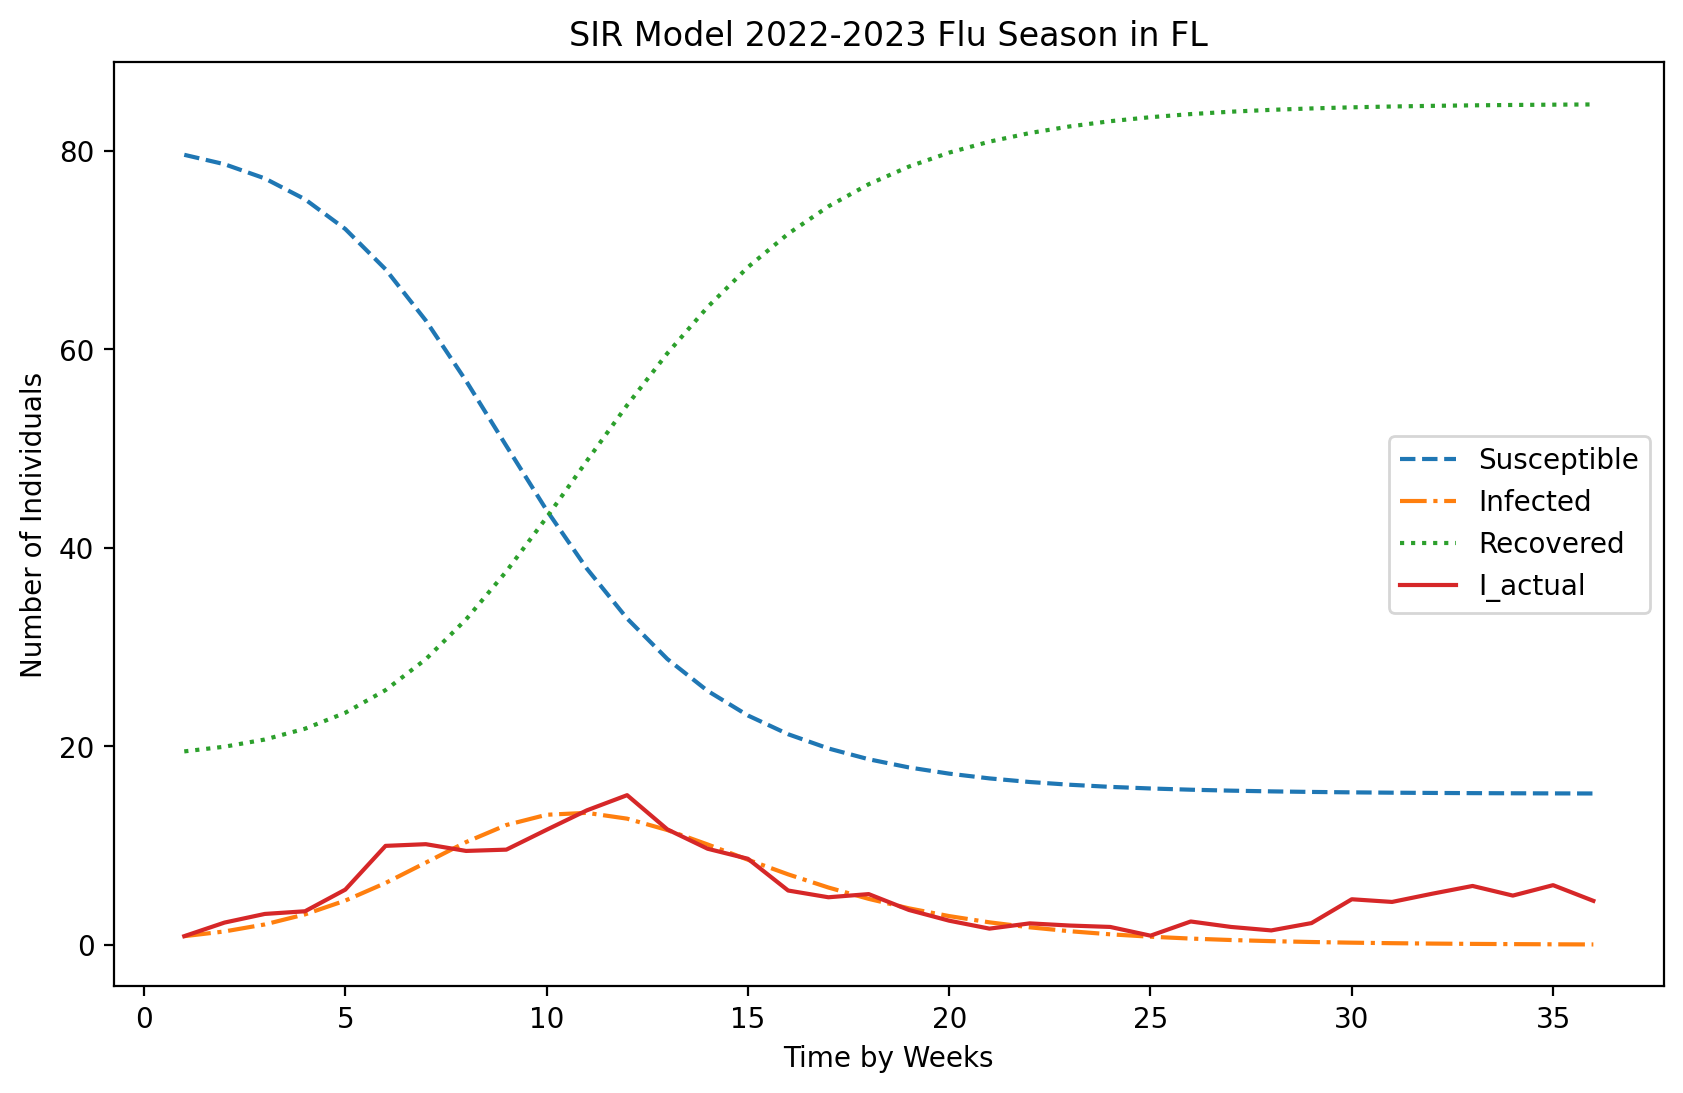

In [301]:
# plot the optimal fit
solution = sir_model_opt(t, optimal_beta, optimal_gamma)
plt.figure(figsize=(10, 6), dpi=200)
plt.plot(t, solution[:, 0], label='Susceptible', linestyle='--')
plt.plot(t, solution[:, 1], label='Infected', linestyle='-.')
plt.plot(t, solution[:, 2], label='Recovered', linestyle=':')
plt.plot(t, flinfr, label='I_actual', linestyle='-')
#plt.plot(t, flweekly, label='R_actual', linestyle='-')
#plt.plot(t, fl_susceptible, label='S_actual', linestyle='-')
plt.xlabel('Time by Weeks')
plt.ylabel('Number of Individuals')
plt.title('SIR Model 2022-2023 Flu Season in FL')
plt.legend()

In [280]:
# Calculate the sum of squared error
optimal_sse = np.sum((solution[:, 1] - flinfr) ** 2)
print(optimal_sse)

# Calculate the mse for the model
optimal_mse = np.mean((solution[:, 1] - flinfr) ** 2)
print(optimal_mse)

# Caluclate the rmse for the model
optimal_rmse = np.sqrt(optimal_mse)
print(optimal_rmse)

225.36763705304472
6.260212140362352
2.50204159445089


In [308]:
init_i = mainfr.iloc[0]
init_r = maweekly.iloc[0]
init_s = ma_susceptible.iloc[0] 
init_conditions = [init_s, init_i, init_r]

In [309]:
from scipy.integrate import odeint

# Time frame
t = np.arange(1, len(new_weekadjusted) + 1)
# A grid of time points (in days)
#t = np.linspace(0, 100, 150)
# Define the SIR model
def sir_model(y, t, beta, gamma):
    s, i, r = y
    n = s + i + r
    dsdt = -beta * (s * i/n) 
    didt = (beta * (s * i/n) ) - (gamma * i)
    drdt = gamma * i
    return [dsdt, didt, drdt]

# Parameters
beta = 0.4
gamma = 0.2
parameters = (beta, gamma)


# Solve the ODE
solution = odeint(sir_model, init_conditions, t, args=parameters)

In [310]:
S,I,R = solution.T

In [311]:
# itertare over the beta and gamma values to find the best fit
best_fit = None
errors = []
best_error = float('inf')
for beta in np.linspace(0, 2, 100):
    for gamma in np.linspace(0, 2, 100):
        parameters = (beta, gamma)
        solution = odeint(sir_model, init_conditions, t, args=parameters)
        error = np.sum(np.square(solution[:, 1] - mainfr))
        errors.append(error)
        if error < best_error:
            best_error = error
            best_fit = (beta, gamma)

In [312]:
from scipy.optimize import curve_fit

# Define the SIR model function again
def sir_model_opt(t, beta, gamma):
    def derivative(y, t):
        s, i, r = y
        n = s + i + r
        dsdt = -beta * (s * i/n) 
        didt = (beta * (s * i/n) ) - (gamma * i)
        drdt = gamma * i
        return [dsdt, didt, drdt]
    return odeint(derivative, init_conditions, t)

# Define the error function
def error_func(t, *params):
    beta, gamma = params
    model = sir_model_opt(t, beta, gamma)[:, 1]
    return np.sum(np.square(model - mainfr))

# Initial guess for parameters
initial_guess = [0.4, 0.2]

# Fit the model to the data
optimal_params, _ = curve_fit(error_func, t, mainfr, p0=initial_guess)

# Extract the optimal parameters
optimal_beta, optimal_gamma = optimal_params

print("Optimal beta:", round(optimal_beta, 4))
print("Optimal gamma:", round(optimal_gamma, 4))

Optimal beta: 1.2898
Optimal gamma: 0.3177


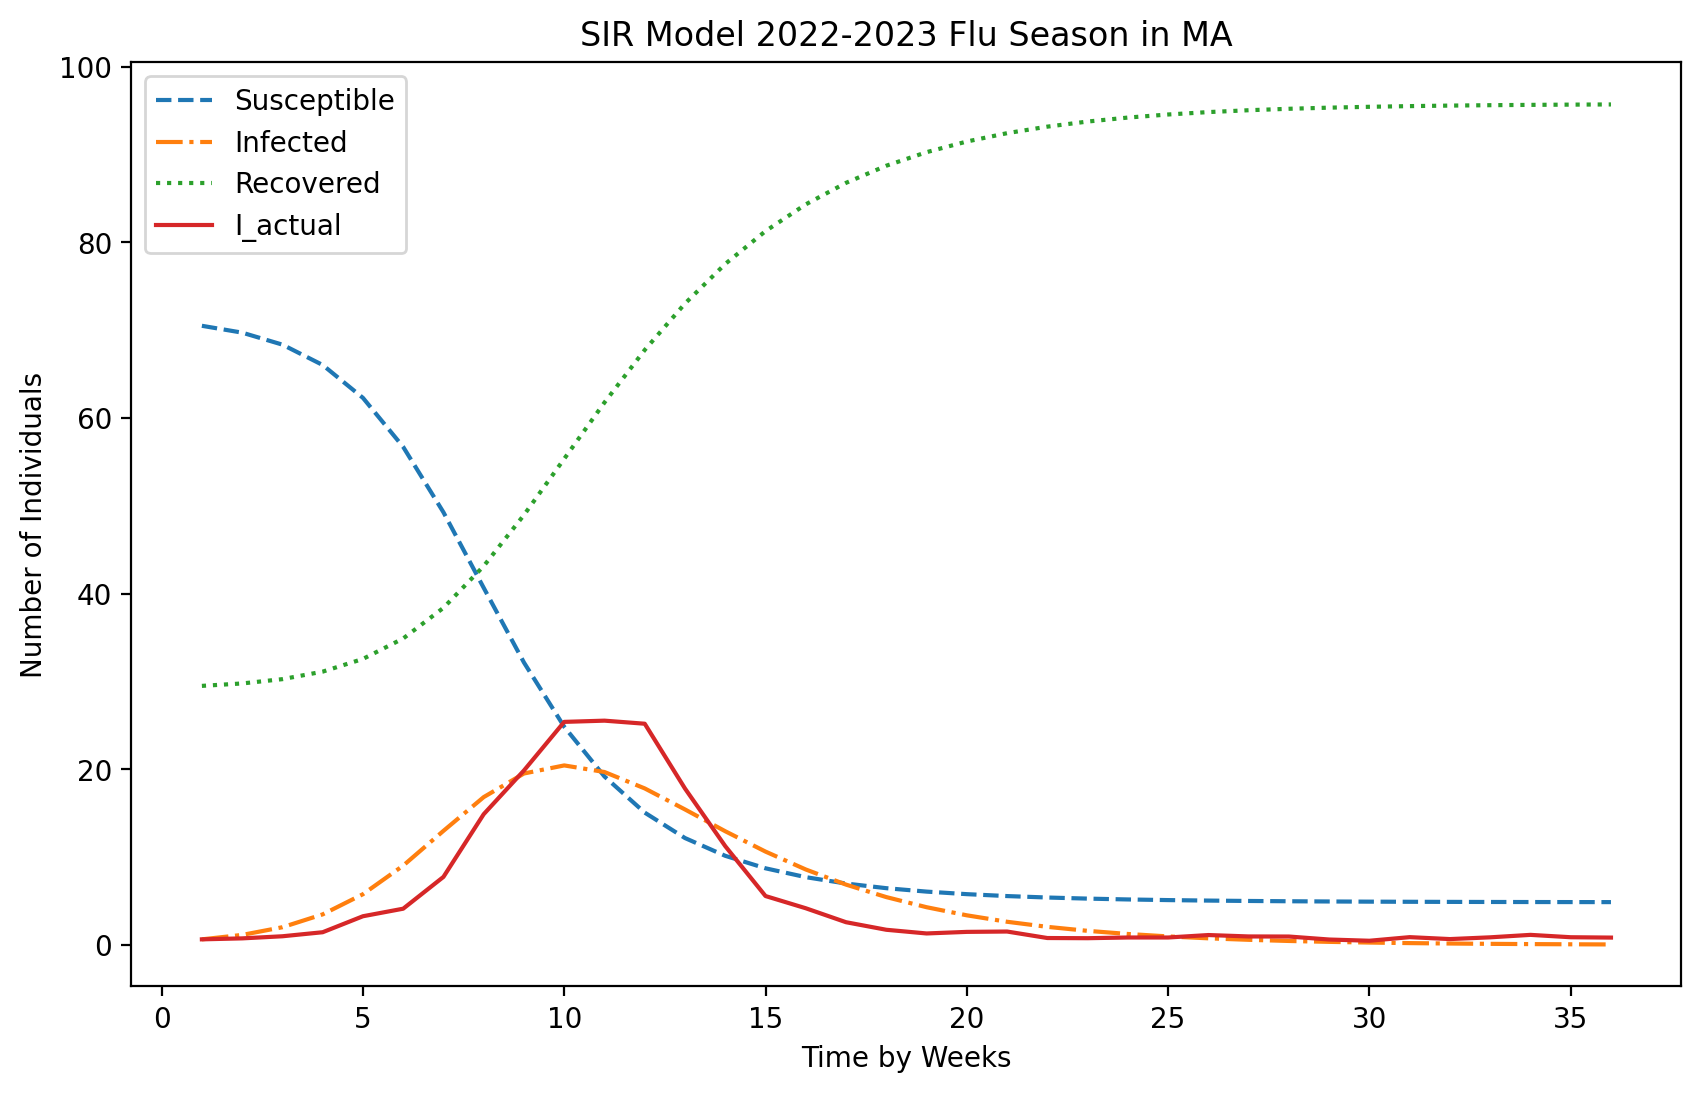

In [313]:
# plot the optimal fit
solution = sir_model_opt(t, optimal_beta, optimal_gamma)
plt.figure(figsize=(10, 6), dpi=200)
plt.plot(t, solution[:, 0], label='Susceptible', linestyle='--')
plt.plot(t, solution[:, 1], label='Infected', linestyle='-.')
plt.plot(t, solution[:, 2], label='Recovered', linestyle=':')
plt.plot(t, mainfr, label='I_actual', linestyle='-')
#plt.plot(t, maweekly, label='R_actual', linestyle='-')
#plt.plot(t, ma_susceptible, label='S_actual', linestyle='-')
plt.xlabel('Time by Weeks')
plt.ylabel('Number of Individuals')
plt.title('SIR Model 2022-2023 Flu Season in MA')
plt.legend()

In [314]:
# Calculate the sum of squared error
optimal_sse = np.sum((solution[:, 1] - mainfr) ** 2)
print(optimal_sse)

# Calculate the mse for the model
optimal_mse = np.mean((solution[:, 1] - mainfr) ** 2)
print(optimal_mse)

# Caluclate the rmse for the model
optimal_rmse = np.sqrt(optimal_mse)
print(optimal_rmse)

286.4152770664055
7.955979918511265
2.8206346659061086


In [670]:
#differential eq update 
def sirs_model(y, t, beta, gamma, xi):
    
    S, I, R = y

    ### To be implemented ###
    n = S + I + R
    dSdt = -beta * (S * I) + xi * R
    dIdt = beta * (S * I) - (gamma * I)
    dRdt = gamma * I - xi  * R
    return [dSdt, dIdt, dRdt]

# Parameters
beta = 0.4
gamma = 0.2
xi = .00001
#xi=0.01
params = (beta, gamma, xi)

# Solve the ODE
solution = odeint(sirs_model, init_conditions, t, args=params)
